Задча 2 (Тренд): у трейдера Паши есть нейрон, который предсказывает вырастет ли цена на нефть или упадёт по значениям в сегодня и вчера. Напишите этот нейрон. Он должен принимать на вход два значения и выдавать +1 или -1.


In [ ]:
import numpy as np

In [ ]:
class Neuron():
    def __init__(self, weights, bias):
        self.bias = bias
        self.weights = weights

    def forward(self, x):
        _sum = np.dot(self.weights,x)
        return 2*(int(_sum-self.bias>0)-0.5)

In [ ]:
w = np.array([1, -1])
neuron = Neuron(weights = w, bias = 0)

In [ ]:
x = np.array([15, 20])
neuron.forward(x)

-1.0

# Классификация с помощью одного нейрона

Задача 1: Вася сдал ЕГЭ по физике на 75 баллов, по математике — 82 балла, русскому языку — 70 баллов, химии — 71 балл и обществознание — 75 баллов. Проходной балл на физфак по трём экзаменам (физика, математика, русский) 240 баллов. Напишите нейрон Васи, который думает о том пройдет ли Вася на физфак или нет.

In [ ]:
#подключаем библиотеку numpy
import numpy as np

In [ ]:
#пишем класс Neuron
class Neuron():
    def __init__(self, weights,bias):
        self.bias = bias
        self.weights = weights

    def forward(self,x):
        _sum = np.dot(self.weights,x)
        return int(_sum-self.bias>0)

In [ ]:
#задаем веса
weights = np.asarray([1,1,1,0,0])
#создаем экземлпяр класса
neuron = Neuron(weights,240)

In [ ]:
#проверяем работу
v_exams = np.array([75,82,70,71,75])
print(neuron.forward(v_exams))

0


# Обучение нейрона

**Задача** 3: Вася сдал ЕГЭ по физике на 75 баллов, по математике — 82 балла, русскому языку — 70 баллов, химии — 71 балл и обществознание — 75 баллов. Проходной балл на физфак по трём экзаменам (физика, математика, русский) не известен. Но известно, как сдавали экзамены ученики год назад и прошли ли они.Напишите нейрон Васи, который думает о том пройдет ли Вася на физфак.

In [ ]:
# результаты остальных. 0 или 1 — прошел или нет
exams=[[76, 89, 84, 80, 77],
        [76, 88, 80, 80, 73],
        [77, 72, 71, 81, 75],
        [71, 70, 81, 81, 86],
        [79, 85, 84, 84, 88],
        [81, 89, 72, 74, 88],
        [76, 78, 76, 87, 73],
        [83, 87, 78, 71, 89],
        [84, 76, 81, 77, 84],
        [72, 83, 86, 73, 87]]

results = [1,1,0,0,1,1,0,1,1,1]

In [ ]:
# массив, по которому удобно итерироваться
exams_np = np.asarray(exams)

In [ ]:
print(exams_np)

[[76 89 84 80 77]
 [76 88 80 80 73]
 [77 72 71 81 75]
 [71 70 81 81 86]
 [79 85 84 84 88]
 [81 89 72 74 88]
 [76 78 76 87 73]
 [83 87 78 71 89]
 [84 76 81 77 84]
 [72 83 86 73 87]]


In [ ]:
print(exams_np.shape)

(10, 5)


In [ ]:
print(exams_np[:,1])
print(exams_np[1,:])

[89 88 72 70 85 89 78 87 76 83]
[76 88 80 80 73]


# Решение 1

Алгоритм 1:

Пройдем по всем людям. Найдем наименьший балл, человек с которым поступил, потом найдем наибольший балл, с которым человек не поступил и посчитаем среднее арифметическое.

In [ ]:
# смотрим только на сумму первых трёх чисел
weights = np.asarray([1,1,1,0,0])

In [ ]:
# наименьший проходной балл
min_pass_sum = 300
for i in range(exams_np.shape[0]):
    exams_sum = np.dot(weights, exams_np[i])
    if exams_sum<min_pass_sum and results[i]==1:
        min_pass_sum = exams_sum
print('min pass exams sum', min_pass_sum)

min pass exams sum 241


In [ ]:
# наибольший непроходной балл
max_not_pass_sum = 0
for i in range(exams_np.shape[0]):
    exams_sum = np.dot(weights, exams_np[i])
    if exams_sum>max_not_pass_sum and results[i]==0:
        max_not_pass_sum = exams_sum
print('max not pass exams sum', max_not_pass_sum)

max not pass exams sum 230


In [ ]:
# в один цикл
min_pass_sum = 300
max_not_pass_sum = 0
for i in range(exams_np.shape[0]):
    exams_sum = np.dot(weights, exams_np[i])
    if exams_sum<min_pass_sum and results[i]==1:
        min_pass_sum = exams_sum
    if exams_sum>max_not_pass_sum and results[i]==0:
        max_not_pass_sum = exams_sum
print('min pass exams sum', min_pass_sum)
print('max not pass exams sum', max_not_pass_sum)

probable_pass_bias = (max_not_pass_sum+min_pass_sum)/2
print('probable pass exams sum',probable_pass_bias)

min pass exams sum 241
max not pass exams sum 230
probable pass exams sum 235.5


In [ ]:
# записываем параметры в наш нейрон
neuron = Neuron(weights,probable_pass_bias)

In [ ]:
#предсказание
print(neuron.forward(v_exams))

0


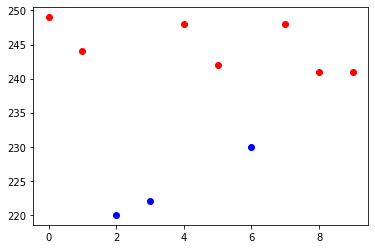

In [ ]:
import matplotlib.pyplot as plt
data = np.dot(exams_np,weights)
for i in range(len(results)):
    if results[i]==1:
        plt.scatter(i,data[i], color='red')
    else:
        plt.scatter(i,data[i], color='blue')

Минус:
данные должны быть линейны разделимы

# Решение 2

Алгоритм 2:

Выберем какой-то порог.
Будем проходить по нашей людям и делать предсказание поступит ли этот человек на физфак или нет. Если мы оказались правы, будем немного поднимать порог, если нет, то будем его опускать.

In [ ]:
weights = np.asarray([1,1,1,0,0])
init_bias = 300
neuron = Neuron(weights=weights,bias=init_bias)

In [ ]:
lr = 1
for i in range(exams_np.shape[0]):
    target = results[i]
    data = exams_np[i]
    out = neuron.forward(data)
    loss = target - out
    neuron.bias -= loss*lr
print(neuron.bias)

293


In [ ]:
for epoch in range(20):
    for i in range(exams_np.shape[0]):
        target = results[i]
        data = exams_np[i]
        out = neuron.forward(data)
        loss = target - out
        neuron.bias -= loss*lr
    print('epoch:', epoch,'bias',neuron.bias)

epoch: 0 bias 286
epoch: 1 bias 279
epoch: 2 bias 272
epoch: 3 bias 265
epoch: 4 bias 258
epoch: 5 bias 251
epoch: 6 bias 245
epoch: 7 bias 241
epoch: 8 bias 240
epoch: 9 bias 240
epoch: 10 bias 240
epoch: 11 bias 240
epoch: 12 bias 240
epoch: 13 bias 240
epoch: 14 bias 240
epoch: 15 bias 240
epoch: 16 bias 240
epoch: 17 bias 240
epoch: 18 bias 240
epoch: 19 bias 240


In [ ]:
class Neuron:
    def __init__(self,weights, bias):
        self.params = {'weights':weights,'bias':bias}

    def forward(self, x):
        return int(np.dot(self.params['weights'],x)-self.params['bias']>0)

    def __call__(self, x):
        return self.forward(x)

In [ ]:
weights = np.asarray([1,1,1,0,0])
init_bias = 300
model = Neuron(weights=weights,bias=init_bias)

In [ ]:
# пишем оптимизатор
class Optimizer:
    def __init__(self, params, param_names, lr):
        self.param_names = param_names
        self.params = params
        self.lr = lr

    def step(self,loss):
        for p_name in self.param_names:
            self.params[p_name] += self.lr*loss

In [ ]:
lr = 1
optimizer = Optimizer(params=model.params, param_names=['bias'], lr=1)

In [ ]:
for epoch in range(10):
    for i in range(len(results)):
        data = exams_np[i]
        pred = model(data)
        loss = pred - results[i]
        optimizer.step(loss)
    print('epoch:', epoch,'bias',model.params['bias'])

epoch: 0 bias 293
epoch: 1 bias 286
epoch: 2 bias 279
epoch: 3 bias 272
epoch: 4 bias 265
epoch: 5 bias 258
epoch: 6 bias 251
epoch: 7 bias 245
epoch: 8 bias 241
epoch: 9 bias 240


# Качество классификации

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
test_exams = np.array(
    [[76, 89, 86, 80, 77],
    [76, 78, 76, 87, 73],
    [78, 86, 80, 80, 73],
    [85, 77, 75, 70, 60]])

test_targets = np.array([1,0,1,0])

In [ ]:
test_preds = np.array([model(test_exams[i]) for i in range(test_exams.shape[0])])
print(test_preds)

[1 0 1 0]


In [ ]:
print(test_preds.shape)

(4,)


In [ ]:
cm = confusion_matrix(test_targets, test_preds, labels=[0,1])

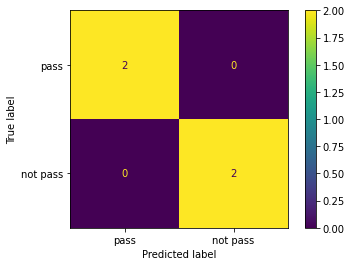

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['pass', 'not pass'])
disp.plot()

# Классификация на несколько классов

Задача 3: Вася сдал ЕГЭ по физике на 75 баллов, по математике — 82 балла, русскому языку — 70 баллов, химии — 71 балл и обществознание — 75 баллов. Проходной балл на физфак по трём экзаменам (физика, математика, русский) 240 баллов. Проходной балл на экономфак по трём экзаменам (математика, русский, обществознание) 220 баллов. Проходной балл на химфак по трём экзаменам (математике, русскому языку и химию) 250 баллов. Куда поступить Васе?

In [ ]:
# решение: 3 нейрона
phys_neuron = Neuron(weights=np.asarray([1,1,1,0,0]),bias=240)
econ_neuron = Neuron(weights=np.asarray([0,1,1,0,1]),bias=220)
chem_neuron = Neuron(weights=np.asarray([0,1,1,1,0]),bias=250)

In [ ]:
exams = np.array([90,82,70,71,74])

In [ ]:
print('физфак',phys_neuron.forward(exams))
print('эконом',econ_neuron.forward(exams))
print('химфак',chem_neuron.forward(exams))

физфак 1
эконом 1
химфак 0


Операция матричного умножения

In [ ]:
# матричное умножение в numpy
A = np.array([[2,1],
                [0,1]])
v = np.array([2,1])
print(np.dot(A,v))

[5 1]


In [ ]:
bias = np.array([1,1])
print(np.dot(A,v)-bias)

[4 0]


In [ ]:
A = np.random.randint(low=-5, high=5, size=(3,3))
print('A',A)
x = np.random.randint(low=-5, high=5, size=3)
print('x',x)

A [[-3 -4 -4]
 [ 4  4 -1]
 [ 1  4 -5]]
x [ 2  3 -4]


In [ ]:
class Linear:
    def __init__(self, in_features, out_features):
        weights = np.ones((out_features, in_features))
        bias = np.zeros((out_features))
        self.parameters = {'weights':weights, 'bias':bias}

    def forward(self, x):
        res = np.dot(sel.parameters['weights'],x)+self.parameters['bias']
        return res/

In [ ]:
# решаем задачу с использованием матричного умножения
class Linear:
    def __init__(self, weights,bias):
        self.params = {'weights':weights,'bias':bias}
    def forward(self,x):
        out = np.dot(self.params['weights'],x)-self.params['bias']
        return out

In [ ]:
weights = np.array([[1,1,1,0,0],
                    [0,1,1,0,1],
                    [0,1,1,1,0]])
bias = np.array([240, 220, 250])
layer = Linear(weights, bias)

In [ ]:
out = layer.forward(exams)
print(out)

[  2   6 -27]


Нормировка

In [ ]:
# софтмакс
def softmax(vect):
    return np.exp(vect)
print(softmax(out))

[2.26032941e-06 4.03428793e+02 1.87952882e-12]


In [ ]:
# с учетом нормировки
def softmax(vect):
    exps = np.exp(vect)
    return exps/np.sum(exps)
print(softmax(out))

[5.60279641e-09 9.99999994e-01 4.65888612e-15]


# Домашнее задание: классификация

Задача 5:  Вася сдал ЕГЭ по физике на 75 баллов, по математике — 82 балла, русскому языку — 70 баллов, химии — 71 балл и обществознание — 75 баллов. На физфак  принимают по трём экзаменам: физика, математика, русский. На экономфак по трём экзаменам: математика, русский, обществознание. На химфак принимают тоже по трём экзаменам: математика, русский и химия. Проходные баллы не известны. Известно, как поступали в прошлом году. Что делать Васе?!



In [ ]:
#результаты прошлого года
test_exams = np.array([[66 79 88 74 70]
                        [67 88 80 66 85]
                        [78 82 70 70 83]
                        [80 63 67 83 62]
                        [81 80 61 83 71]
                        [89 65 61 87 80]
                        [60 71 85 81 88]
                        [71 84 76 86 86]
                        [69 87 87 75 74]
                        [89 89 74 89 78]
                        [71 82 79 84 62]
                        [64 78 66 80 68]
                        [66 77 63 84 87]
                        [73 77 85 68 85]
                        [80 61 79 87 74]
                        [87 66 71 88 67]
                        [74 62 73 76 63]
                        [77 67 63 61 89]
                        [65 81 69 63 81]
                        [88 77 85 71 61]
                        [69 89 63 73 75]
                        [74 67 73 82 87]
                        [84 89 67 80 75]
                        [72 77 74 80 83]
                        [85 84 87 87 87]
                        [72 68 88 74 72]
                        [60 84 66 68 83]
                        [60 71 67 83 70]
                        [78 76 67 62 62]
                        [60 86 64 69 66]])

test_targets = np.array([[0 1 1]
                        [0 1 0]
                        [0 1 0]
                        [0 0 0]
                        [0 0 0]
                        [0 0 0]
                        [0 1 0]
                        [0 1 1]
                        [1 1 1]
                        [1 1 1]
                        [0 0 1]
                        [0 0 0]
                        [0 0 0]
                        [0 1 0]
                        [0 0 0]
                        [0 0 0]
                        [0 0 0]
                        [0 0 0]
                        [0 1 0]
                        [1 0 0]
                        [0 0 0]
                        [0 0 0]
                        [1 1 0]
                        [0 1 0]
                        [1 1 1]
                        [0 0 0]
                        [0 1 0]
                        [0 0 0]
                        [0 0 0]
                        [0 0 0]])

Задача 5\*: «Ускорить» алгоритм из Решения 2